# Street network bearings

Author: [Geoff Boeing](https://geoffboeing.com/)

Calculate street network bearings and visualize the spatial orientation of a street network. See [this notebook](17-street-network-orientations.ipynb) for a superior example!

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

In [2]:
import matplotlib.pyplot as plt
import osmnx as ox
import pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11.4'

### First, look at a non-grid street network

Orinda, California is a hilly suburb with winding loops and cul-de-sacs. We can see this lack of consistent orientation in its histogram of edge bearings.

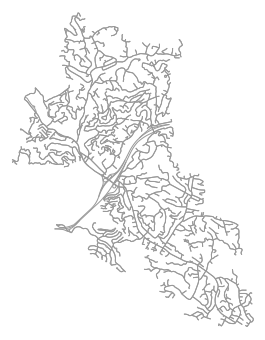

In [3]:
G = ox.graph_from_place('Orinda, California', network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

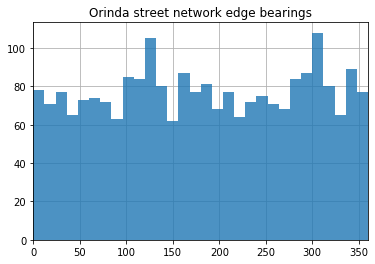

In [3]:
# calculate edge bearings and visualize their frequency
G = ox.add_edge_bearings(G)
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('Orinda street network edge bearings')
plt.show()

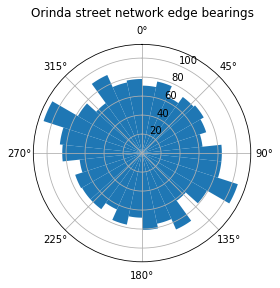

In [4]:
# polar plot
import numpy as np
n = 30
count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=0.0)
ax.set_title('Orinda street network edge bearings', y=1.1)
plt.show()

### Now look at a gridded street network

Santa Monica has an orthogonal grid characterized by four-way intersections. We can see this clear orientation in its histogram of edge bearings.

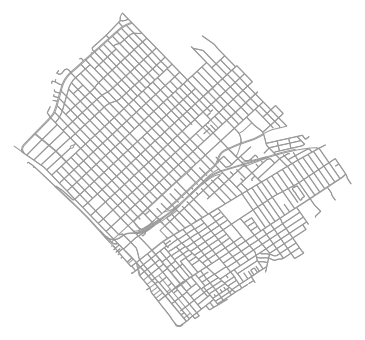

In [5]:
G = ox.graph_from_place('Santa Monica, California', network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

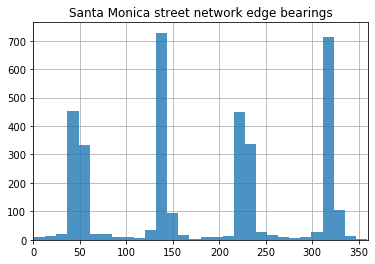

In [6]:
# calculate edge bearings and visualize their frequency
G = ox.add_edge_bearings(G)
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
ax.set_xlim(0, 360)
ax.set_title('Santa Monica street network edge bearings')
plt.show()

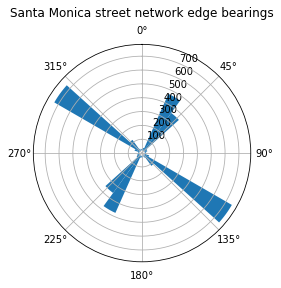

In [7]:
# polar plot
n = 30
count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('Santa Monica street network edge bearings', y=1.1)
plt.show()